# MNIST dataset

Let's first try to take a look at how the data looks like. How can I access the images, plot them, and so on. We will use the functions from `tensorflow` and try to understand what they do. We will try to stay as much as possible in the tensor level, and avoid switching to pandas or numpy too much.

On that note, let's start with a `torch` tutorial on tensors and other usefull functions, tools, structures.

In [1]:
!git clone https://github.com/ProfesseurShadoko/fancy_package.git

fatal: destination path 'fancy_package' already exists and is not an empty directory.


## Torch Tensor Tutorial

Let's start with tensors, the core of every neural network library.

In [2]:
import torch
# from torchvision import datasets, transforms # not compatible with Python 3.13
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fancy_package import *

### Tensor creation

In [3]:
t =torch.tensor(
    [[1, 2], [3, 4], [5, 6]], dtype = torch.float32
)
t_rand = torch.rand((4, 3))
t_zeros = torch.zeros((2, 3))
t_ones = torch.ones((2, 3))
t_eye = torch.eye(3)
t_arange = torch.arange(0, 10, 2)
t_linspace = torch.linspace(0, 1, 5)
t_normal = torch.normal(mean=0, std=1, size=(2, 3))
t_numpy = torch.from_numpy(np.array([[1, 2], [3, 4], [5, 8]]))

t_look = t
print(t_look)
with Message("Looking at tensor properties").tab():
    Message(f"Shape: {t_look.shape}")
    Message(f"Size: {t_look.size()}")
    Message(f"Number of dimensions: {t_look.ndim}")


tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
[i] Looking at tensor properties
 > [i] Shape: torch.Size([3, 2])
 > [i] Size: torch.Size([3, 2])
 > [i] Number of dimensions: 2


### Basic operations

In [4]:
x = torch.tensor([1.0, 2.0, 0.0], dtype=torch.float32)
y = torch.tensor([0.0, -3.0, 0.5], dtype=torch.float32)

# let's make x and y column vectors
x = x.view(-1, 1) # what does view do? => you put in arguments the desired shape (-1 tells torch to guess the size of this dimension)
y = y.view(-1, 1)

print("Shape of x:", x.shape)

M = torch.tensor([
    [1.0, 0, 0],
    [2.0, 1.0, 0],
    [3.0, -4.0, 1.0]
], dtype=torch.float32)

Message("Addition")
s = x+y

Message("Substraction")
d = x-y

Message("Multiplication")
m = x*y

Message("Dot product")
# dp = torch.dot(x, y) # does not work
dp = x.T @ y
print(dp)
outter = x @ y.T
print(outter)

Message("Matrix multiplication")
x2 = M @ x
print(x2)

Message("Summation")
s = torch.sum(M)
print(s)
s = torch.sum(M, dim=0) # sum along the columns (the dimension 0)
print(s)

Shape of x: torch.Size([3, 1])
[i] Addition
[i] Substraction
[i] Multiplication
[i] Dot product
tensor([[-6.]])
tensor([[ 0.0000, -3.0000,  0.5000],
        [ 0.0000, -6.0000,  1.0000],
        [ 0.0000, -0.0000,  0.0000]])
[i] Matrix multiplication
tensor([[ 1.],
        [ 4.],
        [-5.]])
[i] Summation
tensor(4.)
tensor([ 6., -3.,  1.])


### Reshaping

In [19]:
Message("Initializing a 2D tensor")
x = torch.randn(2, 3)
print(x, x.shape, sep = " --> ")

Message("Taking transpose")
x_transpose = x.T
print(x_transpose, x_transpose.shape, sep = " --> ")

Message("Reshaping")
x_reshaped = x.view(3, 2)
print(x_reshaped, x_reshaped.shape, sep = " --> ")

Message("Flattening")
x_flattened = x.view(-1)
print(x_flattened, x_flattened.shape, sep = " --> ")

Message("Adding one dimension")
x_unsqueezed = x.unsqueeze(0) # same as x.view(1, 2, 3)
print(x_unsqueezed, x_unsqueezed.shape, sep = " --> ")

Message("Removing one dimension")
x_squeezed = x_unsqueezed.squeeze(0) # same as x.view(2, 3)
print(x_squeezed, x_squeezed.shape, sep = " --> ")

Message("Expanding a tensor")
x_base = torch.tensor([1, 2, 3])
x_base_column = x_base.view(-1, 1)
x_base_expanded = x_base_column.expand(-1, 3) # -1 means "keep the same size"
print(x_base_expanded, x_base_expanded.shape, sep = " --> ")

[i] Initializing a 2D tensor
tensor([[ 0.1528,  0.8087, -0.9351],
        [ 0.0621,  1.7929,  1.5857]]) --> torch.Size([2, 3])
[i] Taking transpose
tensor([[ 0.1528,  0.0621],
        [ 0.8087,  1.7929],
        [-0.9351,  1.5857]]) --> torch.Size([3, 2])
[i] Reshaping
tensor([[ 0.1528,  0.8087],
        [-0.9351,  0.0621],
        [ 1.7929,  1.5857]]) --> torch.Size([3, 2])
[i] Flattening
tensor([ 0.1528,  0.8087, -0.9351,  0.0621,  1.7929,  1.5857]) --> torch.Size([6])
[i] Adding one dimension
tensor([[[ 0.1528,  0.8087, -0.9351],
         [ 0.0621,  1.7929,  1.5857]]]) --> torch.Size([1, 2, 3])
[i] Removing one dimension
tensor([[ 0.1528,  0.8087, -0.9351],
        [ 0.0621,  1.7929,  1.5857]]) --> torch.Size([2, 3])
[i] Expanding a tensor
tensor([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]) --> torch.Size([3, 3])


In [20]:
x = torch.arange(9).reshape(3, 3) # similar to view, it is all about copying or not I think
print(x, x.shape, sep = " --> ")

x_repeated = x.unsqueeze(0) # add 1 dimesion
x_repeated = x_repeated.expand(2, -1, -1) # expand the first dimension

print(x_repeated, x_repeated.shape, sep = " --> ")

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]) --> torch.Size([3, 3])
tensor([[[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]],

        [[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]]) --> torch.Size([2, 3, 3])


### Broadcasting

This here is super important, it is used all the time in models.

In [26]:
x = torch.arange(3).reshape(3, 1) # column
y = torch.arange(0, 30, 10) # row
braodcasted_sum = x + y # the two tensors are not the same shape, but they can be added because of broadcasting
print(braodcasted_sum, braodcasted_sum.shape, sep = " --> ")

tensor([[ 0, 10, 20],
        [ 1, 11, 21],
        [ 2, 12, 22]]) --> torch.Size([3, 3])


Then you also have many math functions (exponential, sigmoid, tanh, relo, clamp to clip between values...). I will skip the comments of ChatGPT about cloning or CPU/GPU stuff.

### Tensor visualization

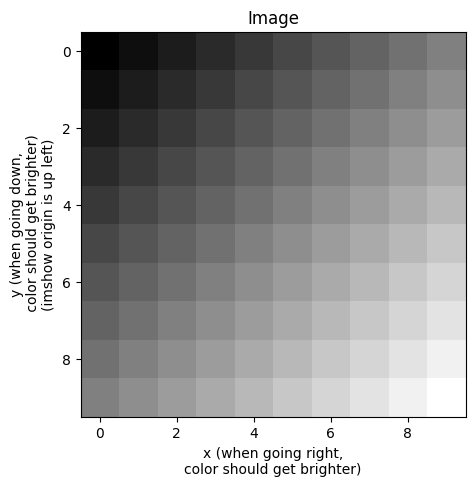

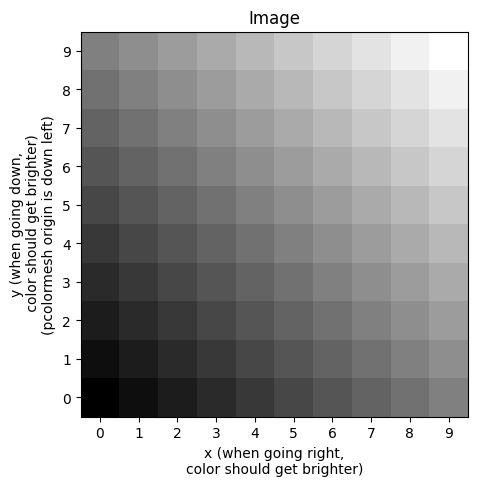

In [37]:
xgraident = torch.arange(0, 255, 255//9).view(-1, 1) # column
ygradient = torch.arange(0, 255, 255//9)
image = xgraident + ygradient # the two tensors are not the same shape, but they can be added because of broadcasting

# use plt.imshow
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.xlabel("x (when going right,\ncolor should get brighter)")
plt.ylabel("y (when going down,\n color should get brighter)\n(imshow origin is up left)")
plt.title("Image")

# use plt.colormesh
plt.figure(figsize=(5, 5))
plt.pcolormesh(image, cmap='gray')
plt.xlabel("x (when going right,\ncolor should get brighter)")
plt.ylabel("y (when going down,\n color should get brighter)\n(pcolormesh origin is down left)")
# cneter x and y ticks on labels
plt.xticks(np.arange(0.5, 10.5, 1), np.arange(10))
plt.yticks(np.arange(0.5, 10.5, 1), np.arange(10))
plt.title("Image")
plt.show()

### Gradient stuff

In [39]:
x = torch.tensor([2.0], requires_grad=True)
y = x ** 3 + 2 * x
y.backward() # compute the gradient of y with respect to x
print(x.grad) # print the gradient of y with respect to x # dy/dx = 3x² + 2 = 3*4 + 2 = 14

tensor([14.])


## MNIST data

Let's load the data and take a look at it. The files are binary encoded (`*-ubiyte`). To read these binary bytes, we use the package `struct`.

In [40]:
import struct
bytesstring = b'\x00\x00\x08\x03' # 0x0803 = 8 * 256 + 3 * 1 = 2048 + 3 = 2051
struct.unpack(">I", bytesstring) # >I means big-endian unsigned int


(2051,)

Let's read our files with that!

In [44]:
path = "data/t10k-images-idx3-ubyte"

with open(path, "rb") as f:
    magic, num, rows, cols = struct.unpack(">IIII", f.read(16)) # magic is always 2051, it means 'image'
    # then you have the number of images, the number of rows and the number of columns
    # f.read(16) is simply the header of the file
    Message(f"Loading {num} images of size {rows}x{cols}")
    data = f.read()
    images = torch.frombuffer(data, dtype=torch.uint8) # read the rest of the file
    images = images.view(num, rows, cols) # reshape the data to (num, rows, cols)
    images = images / 255.0 # normalize the data to [0, 1]

[i] Loading 10000 images of size 28x28


In [46]:
images.shape

torch.Size([10000, 28, 28])

Let's plot one image!

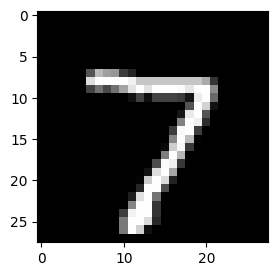

In [49]:
image = images[0] # take the first image
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap='gray')
plt.show()

## Torch Dataset

According to ChatPGT, these datasets are very important when using `torch`. We will see what they do and how to use them. A `dataset` is a Pyton object that represents a collection of data samples. It must implement two methods: `__len__` and `__get_item__` who returns a tuple with the data (as a tensor) and the label(s). Let's make an example with the MNIST data that we have.

In [ ]:
from torch.utils.data import Dataset, DataLoader

class MNISTDataset(Dataset):
    train_images_path = "data/train-images-idx3-ubyte"
    train_labels_path = "data/train-labels-idx1-ubyte"
    test_images_path = "data/t10k-images-idx3-ubyte"
    test_labels_path = "data/t10k-labels-idx1-ubyte"
    
    @staticmethod
    def load_images(path:str):
        with open(path, "rb") as f:
            magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
            data = f.read()
            images = torch.frombuffer(data, dtype=torch.uint8)
            images = images.view(num, rows, cols)
            images = images / 255.0
        return images
    
    @staticmethod
    def load_labels(path:str):
        with open(path, "rb") as f:
            magic, num = struct.unpack(">II", f.read(8))
            data = f.read()
            labels = torch.frombuffer(data, dtype=torch.uint8)
            labels = labels.view(num)
        return labels
    
    def __init__(self, train:bool = True):
        if train:
            images_path = MNISTDataset.train_images_path
            labels_path = MNISTDataset.train_labels_path
        else:
            images_path = MNISTDataset.test_images_path
            labels_path = MNISTDataset.test_labels_path
        
        self.images = MNISTDataset.load_images(images_path)
        self.labels = MNISTDataset.load_labels(labels_path)
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index:int):
        return self.images[index], self.labels[index]
    
    def plot(self, idx:int = None):
        if idx is None:
            idx = np.random.randint(0, len(self.images))
        image, label = self[idx]
        plt.figure(figsize=(3, 3))
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {label.item()}")
        plt.axis('off')
        plt.show()

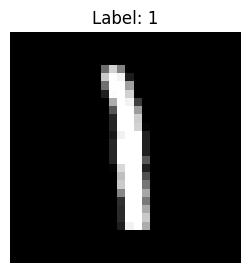

In [51]:
train_dataset = MNISTDataset(train=True)
train_dataset.plot()

Let's get an overview of how one should use these datasets.

In [53]:
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle=True)

for batch in train_loader:
    images, labels = batch
    print(images.shape, labels.shape) # (64, 28, 28) (64,)
    break


torch.Size([64, 28, 28]) torch.Size([64])


So the whole idea here is to make the training faster. `DataLoader` and the batch stuff makes paralelization on CPUs and GPUs possible. Training also works better for some reason. Anyway...